# JPK AFM data analysis for liquid samples

## Import libraries
Run this ONLY ONCE. Always restart kernel before running.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

import sys
import os
from datetime import datetime
from PyQt5.QtWidgets import QApplication, QFileDialog, QListView, QTreeView, QAbstractItemView
import matplotlib.pyplot as plt
import wetting

app = QApplication(sys.argv)
plt.close('all')

#function to select multiple folders from dialog
def get_directories(caption=""):
    file_dialog = QFileDialog(caption=caption)
    file_dialog.setFileMode(QFileDialog.DirectoryOnly)
    file_dialog.setOption(QFileDialog.DontUseNativeDialog, True)
    file_view = file_dialog.findChild(QListView, 'listView')

    if file_view:
        file_view.setSelectionMode(QAbstractItemView.MultiSelection)
    f_tree_view = file_dialog.findChild(QTreeView)
    if f_tree_view:
        f_tree_view.setSelectionMode(QAbstractItemView.MultiSelection)

    if file_dialog.exec():
        paths = file_dialog.selectedFiles()
    else:
        paths = []

    return paths

## Run surface tension analysis code
Run this to execute all relevant cells to obtain surface tension from AFM data and simulations. Make sure the simulation data paths are correct.

In [66]:
%%javascript
Jupyter.notebook.execute_cells([6,8,10,12])

<IPython.core.display.Javascript object>

## JPK data raw files

In [67]:
img_file_path, _ = QFileDialog.getOpenFileName(caption='Select JPK/QI data') #JPK image data (*.jpk or *.jpk-qi-data)
#file_path = 'data/qi-area2-data-2021.07.10-19.22.05.499.jpk-qi-data'
fd_file_paths, _ = QFileDialog.getOpenFileNames(caption='Select JPK force data') #JPK force data (*.jpk-force)
#fd_file_paths = ['../20210420 silicone oil tip-pdms brush/force-save-area4-f2_s10-2021.04.20-17.57.38.004.jpk-force']
output_dir = QFileDialog.getExistingDirectory(caption='Select output data folder') #output folder

#make output directory
if output_dir == '':
    output_dir = os.path.dirname(img_file_path) + '/analysis'
file_name = os.path.basename(img_file_path)
timestamp = datetime.today().strftime('%y%m%d-%H%M%S')
output_path = f'{output_dir}/{file_name}_results_{timestamp}'
os.makedirs(output_path, exist_ok=True)

print('Image data:\n', img_file_path, '\nForce data:\n', fd_file_paths, '\nOutput folder:\n', output_path)

Image data:
 E:/Work/AFM/20211125 mineral oil_stamped_pdmsbrushtip/save-area2-2021.11.25-20.03.36.808.jpk 
Force data:
 ['E:/Work/AFM/20211125 mineral oil_stamped_pdmsbrushtip/force-save_area2_drops-2021.11.25-20.15.10.320.jpk-force', 'E:/Work/AFM/20211125 mineral oil_stamped_pdmsbrushtip/force-save_area2_drops-2021.11.25-20.17.40.107.jpk-force', 'E:/Work/AFM/20211125 mineral oil_stamped_pdmsbrushtip/force-save_area2_drops-2021.11.25-20.20.09.604.jpk-force', 'E:/Work/AFM/20211125 mineral oil_stamped_pdmsbrushtip/force-save_area2_drops-2021.11.25-20.22.39.507.jpk-force'] 
Output folder:
 E:/Work/AFM/20211125 mineral oil_stamped_pdmsbrushtip/analysis/save-area2-2021.11.25-20.03.36.808.jpk_results_220313-174940


## Get liquid drop properties

click
-2.2635788475537505e-05 1.6263953733760644e-05 8.13507041112331e-06
click
-5.6946120049492686e-06 1.3440424321995936e-05 8.14243176409715e-06
click
1.63642115244625e-05 1.74992478514077e-05 8.176132557543783e-06
click
1.759950564210956e-05 -2.61839920741583e-06 8.129390744980624e-06
click
-5.341670828478682e-06 5.580713808194651e-07 8.110813711119134e-06
click
-2.1929906122596328e-05 -5.007521485922988e-07 8.0953706650913e-06
click
-2.1224023769655154e-05 -2.308898744270995e-05 8.040985053404894e-06
click
-6.224023769655152e-06 -1.9559575678004067e-05 8.067781662256666e-06
click
1.548185858328603e-05 -2.2736046266239362e-05 8.076718405878728e-06
m [ 8.11682372e-06  2.23907153e-03 -2.83155922e-01  1.01056858e-03
  3.53845906e+00 -8.11643021e+04  2.47920098e+00  5.70089437e+05
 -3.18869510e+00]
label h h_raw V V_raw
None
-1.7353675226836177e-05 -1.2370583888580953e-05 -1.7353675226836177e-05 -1.2370583888580953e-05
[74] [43] [2]
FD Fit: [ 3.58462219e-02 -3.89511054e-07]
before
curs

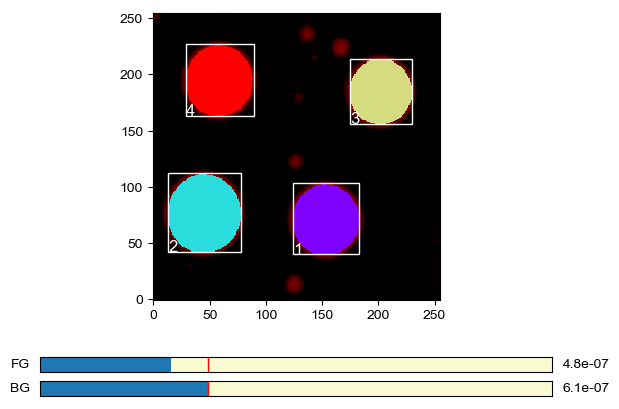

In [68]:
plt.close('all')
#drop analysis of AFM data
drop_df, fig_list = wetting.get_drop_prop(img_file_path, output_path, fd_file_paths,
                                                       level_order=2)#5000 [60,62]
for fig in fig_list:
    display(fig)

## Surface Evolver simulation data files

c:\users\sudersanp\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning:

Casting complex values to real discards the imaginary part

c:\users\sudersanp\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning:

Casting complex values to real discards the imaginary part



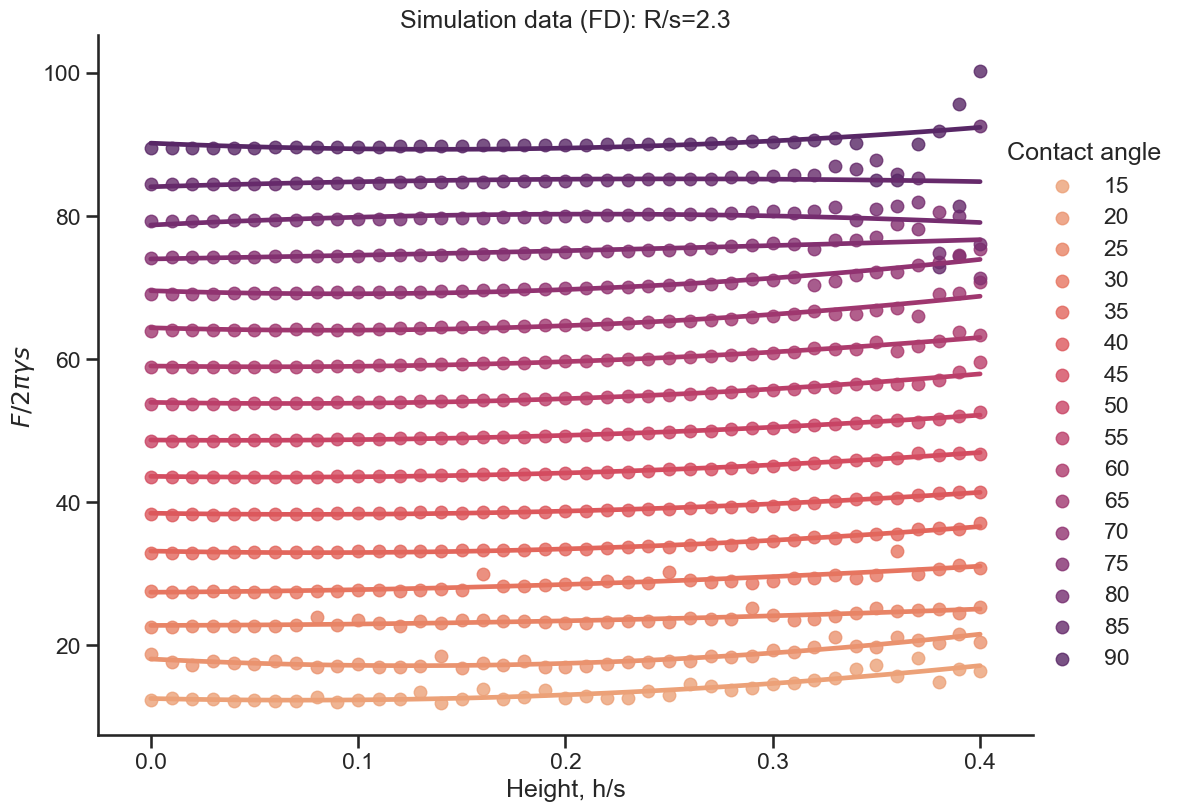

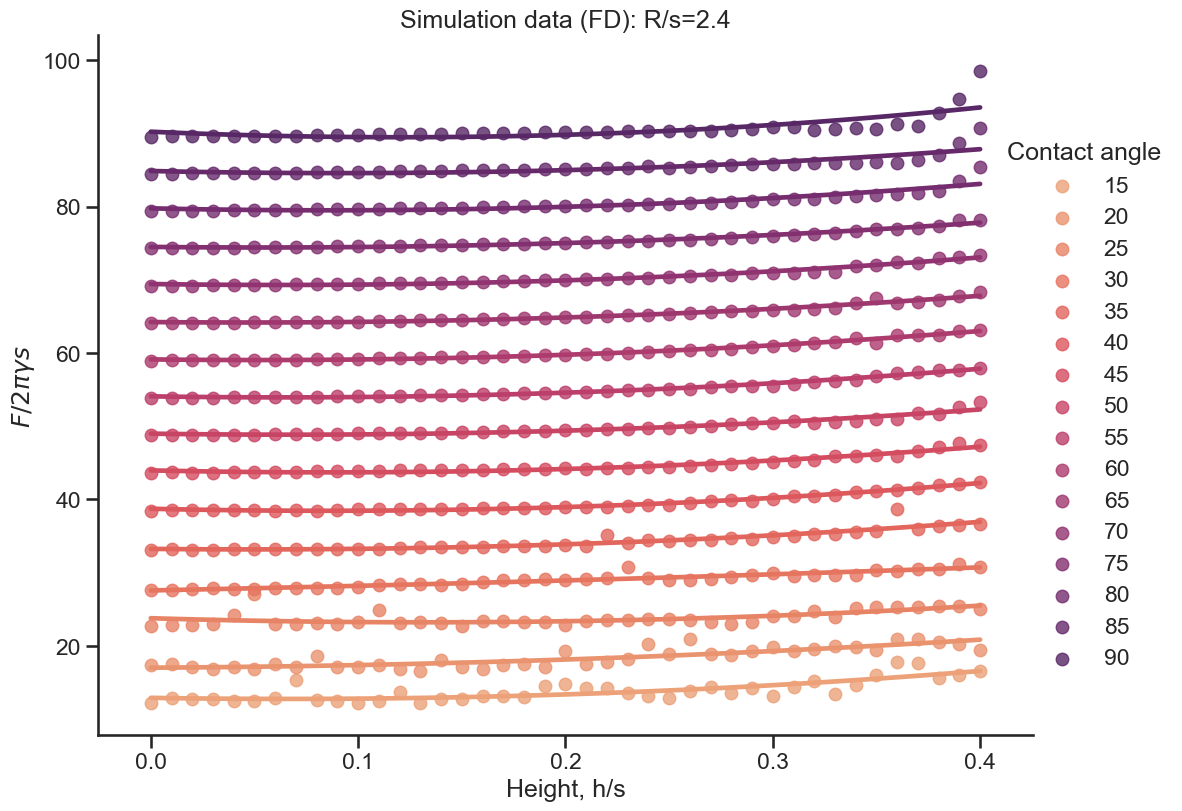

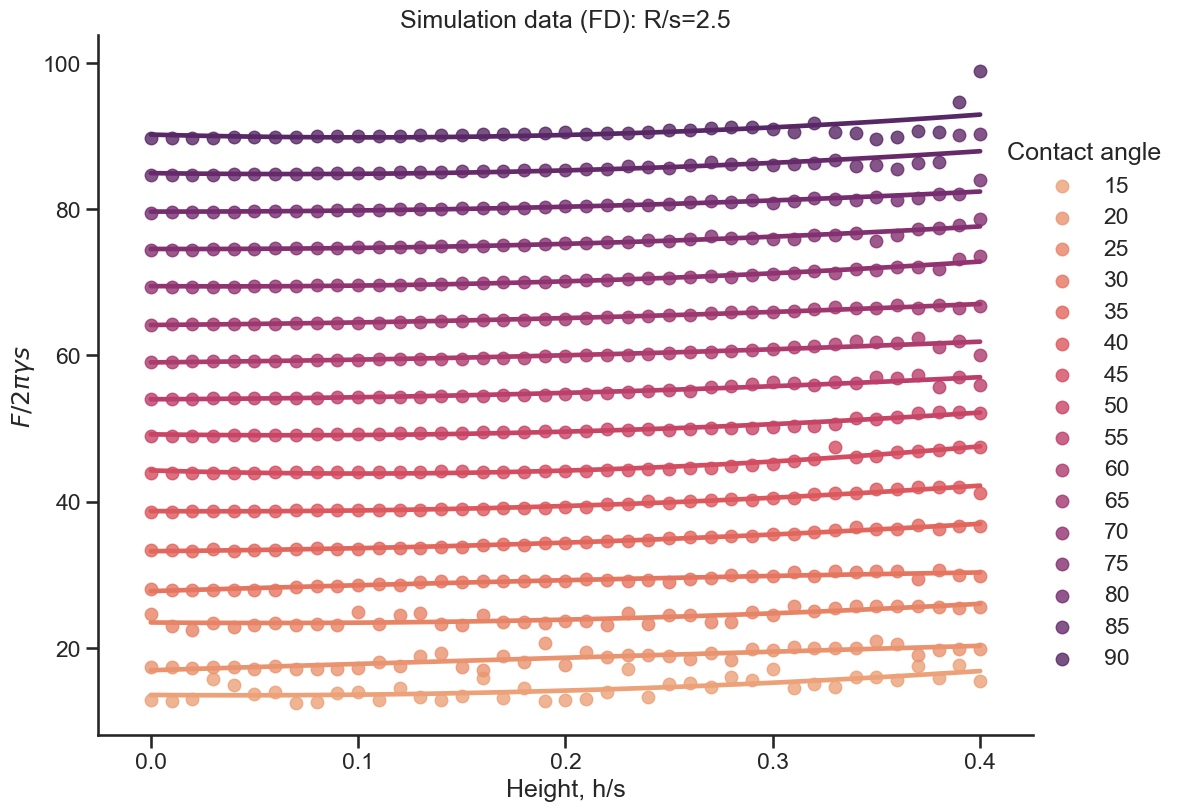

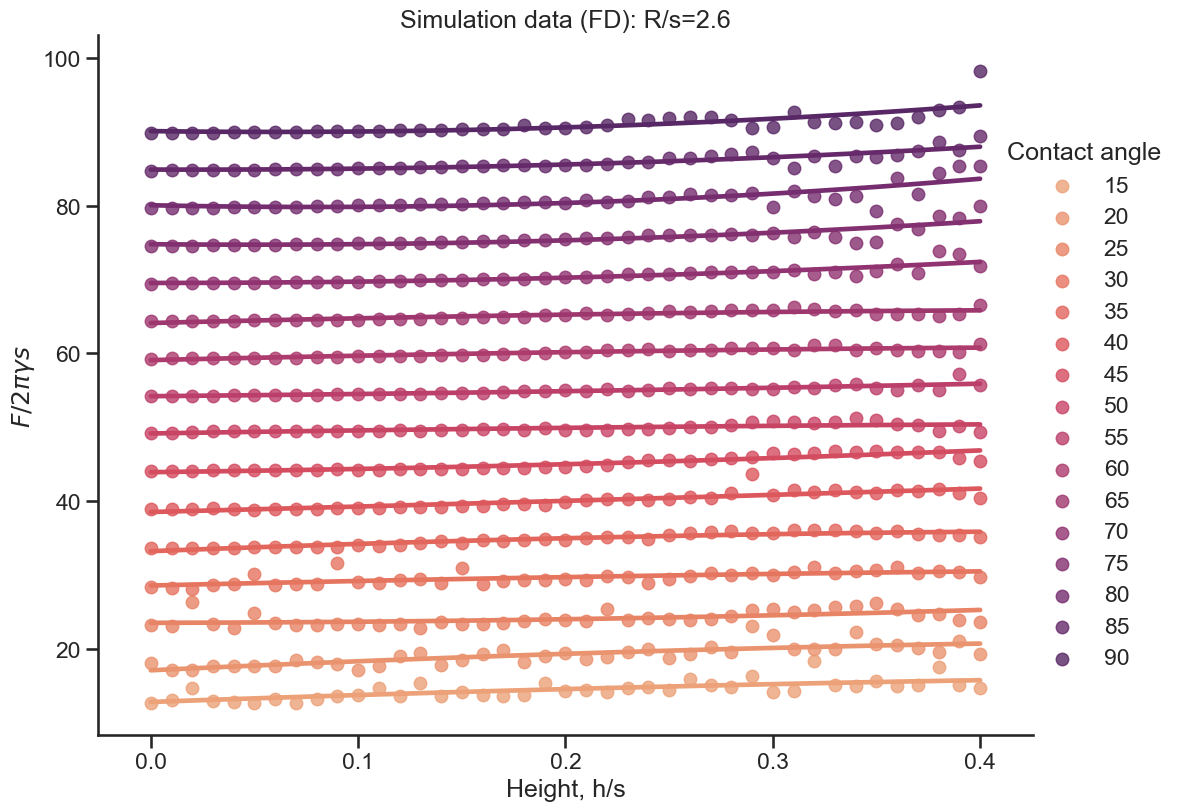

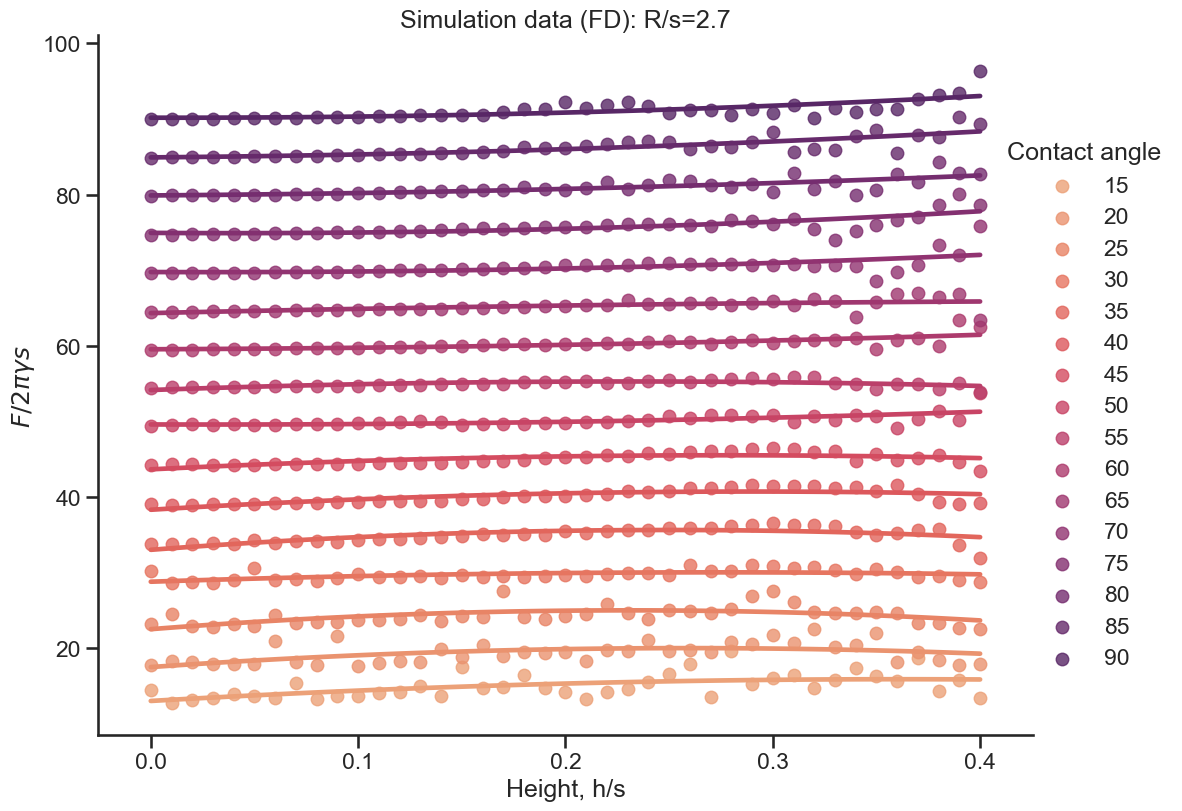

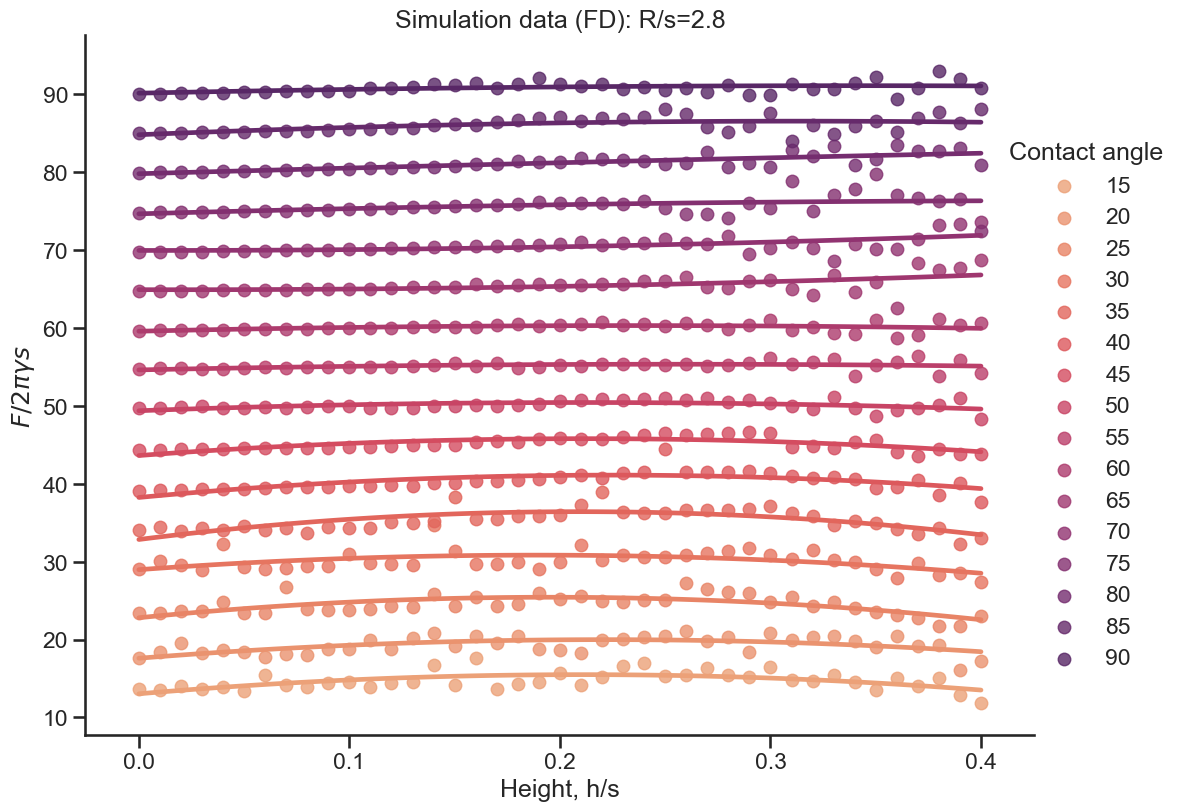

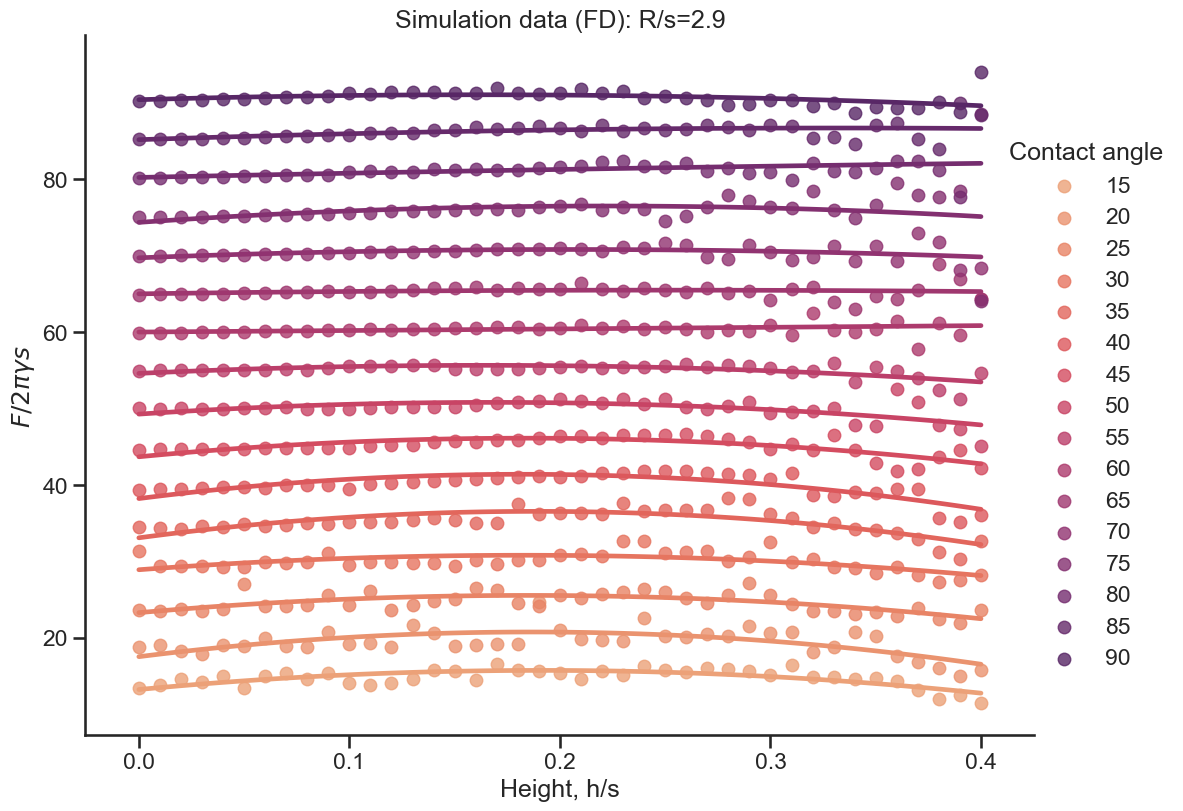

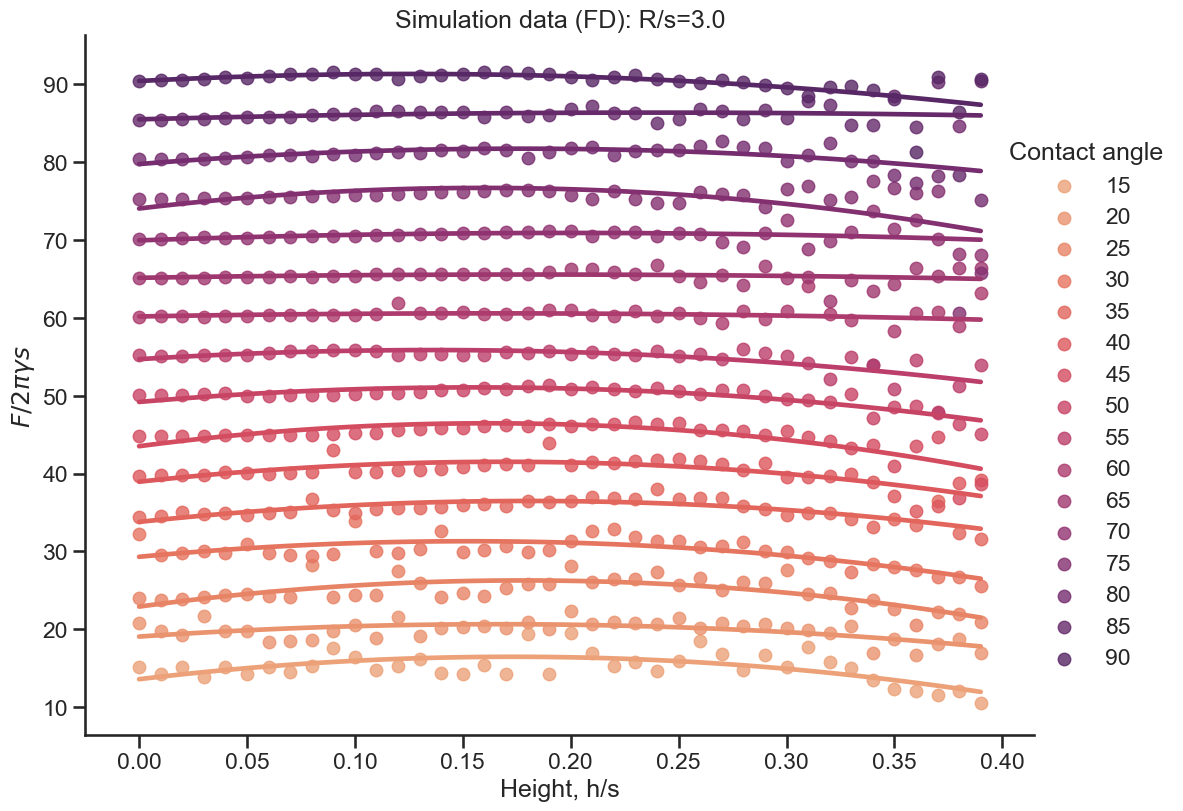

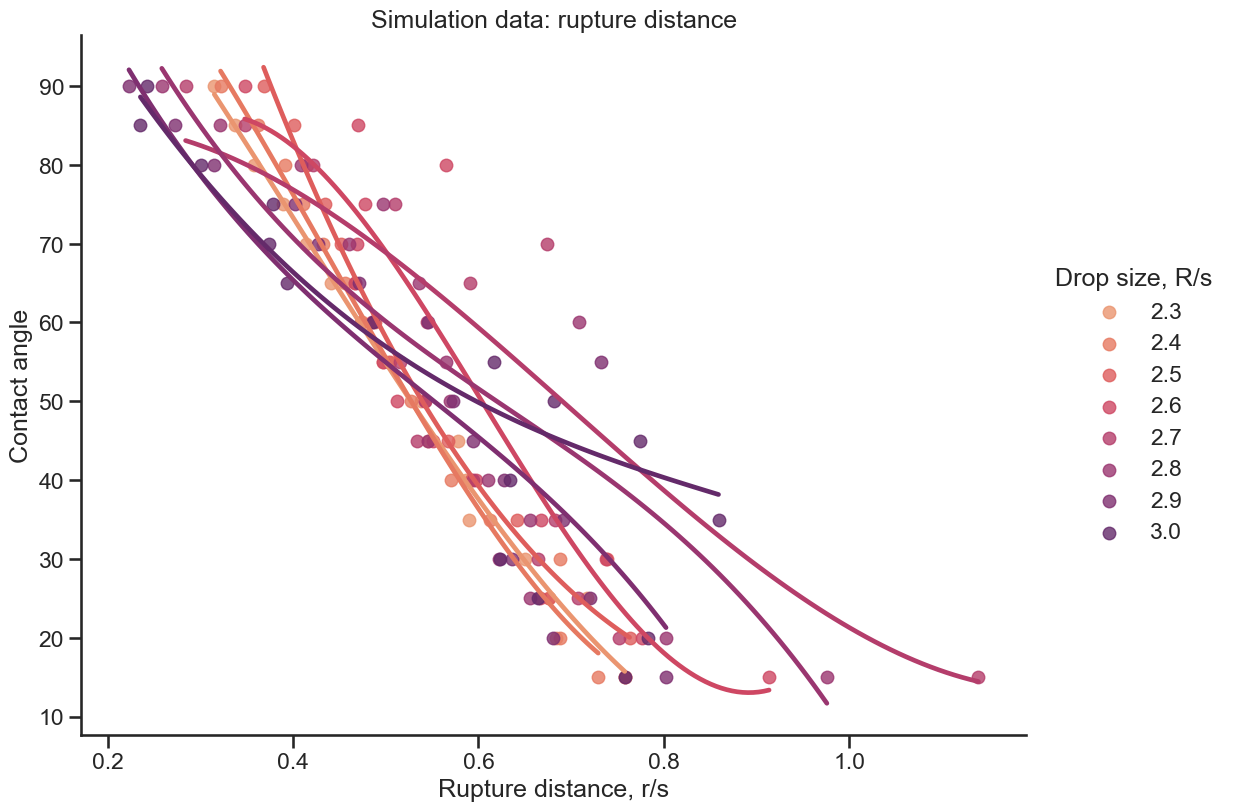

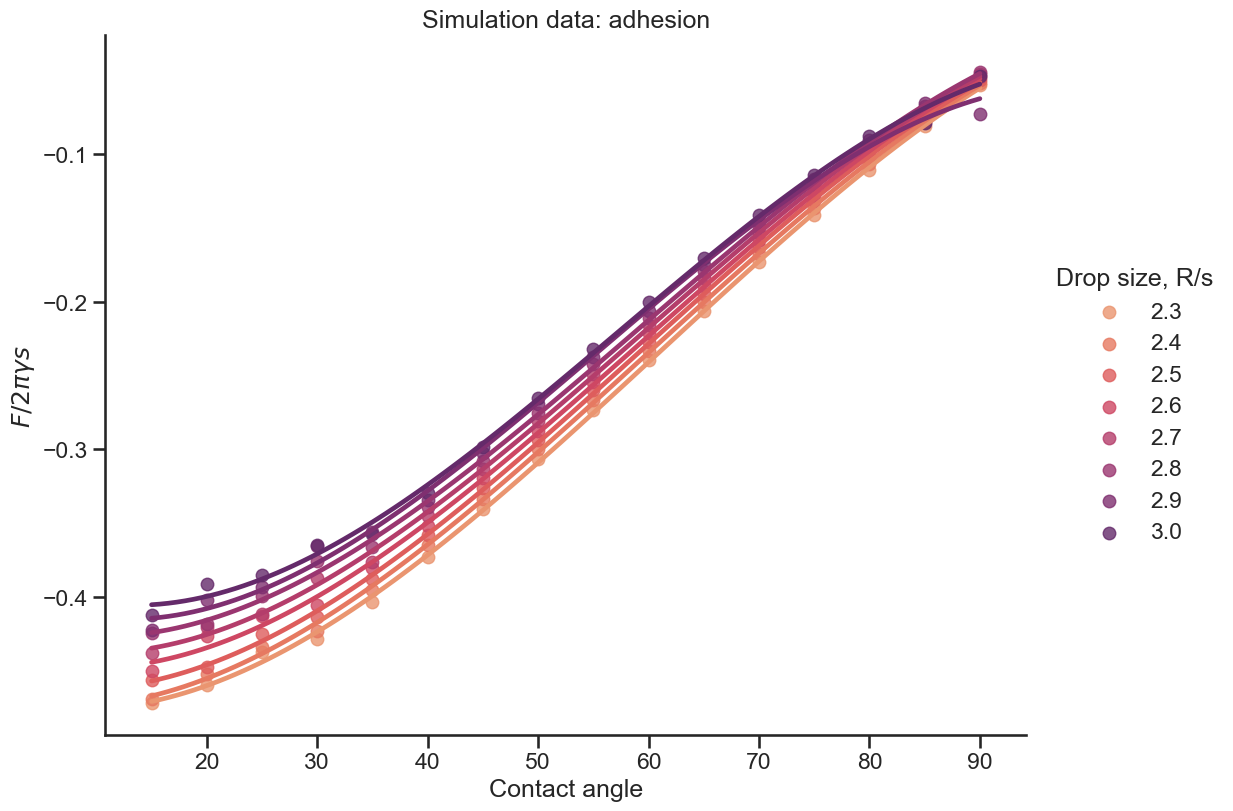

In [5]:
plt.close('all')

simu_folderpath = 'E:/Work/Surface Evolver/afm_pyramid/data/20220309_rfesp_np_fd/'

#combine simulation data for tip geometry
simu_df, simu_df_anal, fig_list = wetting.combine_simul_dirs(simu_folderpath, plot=True)

#show plots below
for f in fig_list:
    display(f)
plt.close('all')

## Droplet surface tension calculation

Label  Curvature  Contact Radius  Max Height  Max Height raw        Volume  \
0      1   0.000013        0.000006    0.000002        0.000002  1.095441e-16   
1      2   0.000014        0.000007    0.000002        0.000002  1.437406e-16   
2      3   0.000012        0.000006    0.000002        0.000002  9.115202e-17   
3      4   0.000013        0.000006    0.000002        0.000002  1.131082e-16   

     Volume raw  Drop contact angle Max Adhesion  Adhesion (FD)  ...  \
0  9.999777e-17           29.674020         None   7.101013e-08  ...   
1  1.335615e-16           30.521741         None   7.842793e-08  ...   
2  8.217857e-17           29.516004         None   6.585681e-08  ...   
3  1.037926e-16           30.494964         None   7.279074e-08  ...   

        R/s                                           AFM file  \
0  2.142629  E:/Work/AFM/20211125 mineral oil_stamped_pdmsb...   
1  2.120677  E:/Work/AFM/20211125 mineral oil_stamped_pdmsb...   
2  2.146803  E:/Work/AFM/20211125 mineral oil_stamped_pdmsb...   
3  2.121360  E:/Work/AFM/20211125 mineral oil_stamped_pdmsb...   

   Simulation R/s  Surface Tension (rupture, mN)  Tip contact angle (rupture)  \
0             2.1                      19.364189                    67.934277   
1             2.1                      18.251024                    65.933523   
2             2.1                      19.204071                    68.098283   
3             2.1                      18.061428                    65.451894   

   F_fit_actual Surface Tension (fixed, mN)  Tip contact angle (fixed)  \
0     -0.196626                   25.645114                       75.0   
1     -0.210462                   25.871705                       75.0   
2     -0.195495                   25.286729                       75.0   
3     -0.213801                   26.009114                       75.0   

   F_fit_fixed                                    Simulation file  
0    -0.148469  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
1    -0.148469  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
2    -0.148469  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
3    -0.148469  E:/Work/Surface Evolver/afm_pyramid/data/20220...  

[4 rows x 28 columns]

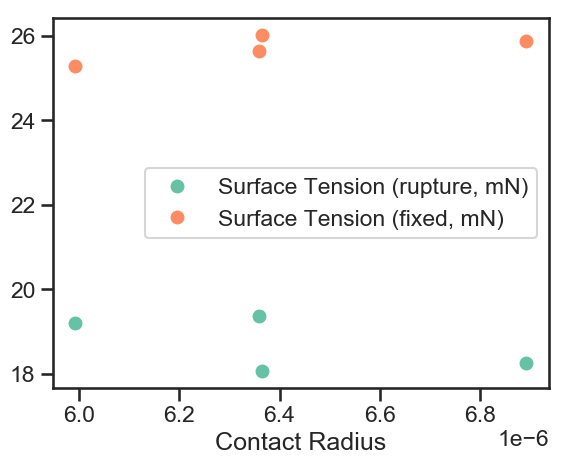

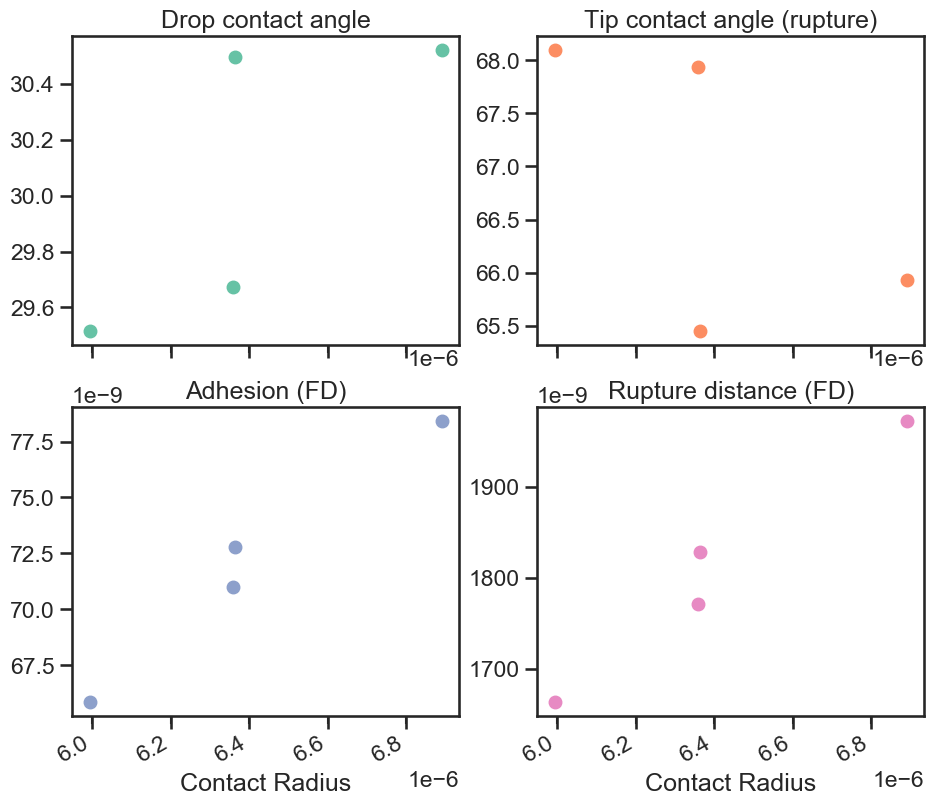

In [73]:
plt.close('all')

contact_angle = 75 #Set fixed value to calculate its corresponsing surface tension
#calculate surface tension (from rupture distance)
output_df = wetting.get_surface_tension3(drop_df, simu_df_anal,contact_angle,
                                          fd_file_paths, output_path, True)

output_df_filtered = output_df[output_df['FD file'] != '']
display(output_df_filtered)

ax = output_df_filtered.plot(x='Contact Radius', y=['Surface Tension (rupture, mN)','Surface Tension (fixed, mN)'],
                             marker = "o", ls="")
ax.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig1 = ax.get_figure()
display(fig1)
fig1.savefig(f'{output_path}/surface_tension.png', bbox_inches = 'tight',
             transparent = False)

plot_vars = ['Drop contact angle','Tip contact angle (rupture)',
             'Adhesion (FD)', 'Rupture distance (FD)']
ax = output_df_filtered.plot(x='Contact Radius', y=plot_vars,title = plot_vars,
                             marker = "o", ls="", subplots=True, layout=(2,2), figsize=(11,10),
                             legend=False)
#number formatting
ax[1][0].ticklabel_format(axis='y', style='sci', scilimits=(-9,-9))
ax[1][1].ticklabel_format(axis='y', style='sci', scilimits=(-9,-9))
ax[1][1].ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig2 = ax[0][0].get_figure()
display(fig2)
fig2.savefig(f'{output_path}/other_results.png', bbox_inches = 'tight',
             transparent = False)

## Combine results from different folders

In [10]:
folder_paths = get_directories("Select analysis result folder (containing output Excel file)")
summary_df = wetting.combine_result_spreadsheets(folder_paths)
#summary_df.to_excel(f'{file_path}/summary_data-{afm_filename}.xlsx', index=None)

Label     Curvature  Contact Radius    Max Height  Max Height raw  \
0       1  1.047711e-05    4.213572e-06  8.846317e-07    8.916580e-07   
1       2  7.006916e-06    2.551420e-06  4.810345e-07    4.850092e-07   
2       3  5.827957e-06    2.084478e-06  3.855278e-07    3.907252e-07   
3       4  9.461590e-06    3.662739e-06  7.377132e-07    7.452674e-07   
4       5  9.657373e-06    3.927547e-06  8.347189e-07    8.346902e-07   
5       6  4.433257e-06    1.623301e-06  3.078887e-07    3.079007e-07   
6       7  7.544027e-06    2.868056e-06  5.664488e-07    5.683624e-07   
7       8  5.776817e-06    2.149291e-06  4.147126e-07    4.152032e-07   
8       9  1.080089e-06    8.964243e-07  4.775814e-07    5.883339e-07   
0       1  1.177440e-05    5.007064e-06  1.117674e-06    1.119875e-06   
1       2  1.165805e-05    4.867265e-06  1.064662e-06    1.068759e-06   
2       3  1.170587e-05    4.825695e-06  1.040972e-06    1.044066e-06   
3       4  1.208132e-05    4.946458e-06  1.059031e-06    1.063259e-06   
0       1  9.087391e-07    7.493506e-07  3.946570e-07    5.244032e-07   
1       2  4.336719e-06    1.697051e-06  3.458355e-07    3.479403e-07   
2       3  3.634085e-06    1.441810e-06  2.982556e-07    2.990215e-07   
3       4  3.158554e-06    1.253925e-06  2.595651e-07    2.596909e-07   
4       5  4.410154e-06    1.766384e-06  3.691956e-07    3.705753e-07   
5       6  6.018940e-07    5.706510e-07  4.104943e-07    2.486674e-07   
6       7  7.042207e-06    2.924293e-06  6.358674e-07    6.354139e-07   
7       8  3.335563e-06    1.261674e-06  2.478197e-07    2.506797e-07   
8       9  3.917406e-06    1.559090e-06  3.236188e-07    3.253040e-07   
9      10  1.121525e-05    4.757460e-06  1.059050e-06    1.059287e-06   
10     11  9.556632e-06    3.872936e-06  8.199518e-07    8.247282e-07   
11     12  6.509284e-06    2.587975e-06  5.365826e-07    5.401173e-07   
12     13  2.746892e-07    2.746498e-07  2.700387e-07    2.037330e-07   
13     14  3.440254e-06    1.269414e-06  2.427651e-07    2.441667e-07   
14     15  6.715898e-06    2.683602e-06  5.594732e-07    5.626792e-07   
15     16  6.120389e-06    2.380855e-06  4.820657e-07    4.833571e-07   
16     17  8.253349e-06    3.318593e-06  6.965833e-07    6.975855e-07   
17     18 -5.737277e-07    5.049547e-07 -8.460953e-07    2.358428e-07   
0       1  9.571244e-06    5.246524e-06  1.566077e-06    1.571397e-06   
1       2  9.918927e-06    5.377867e-06  1.584441e-06    1.588529e-06   
2       3  9.263647e-06    4.977752e-06  1.451020e-06    1.453163e-06   
3       4  8.846546e-06    4.749226e-06  1.382885e-06    1.394964e-06   

          Volume    Volume raw  Drop contact angle  Max Adhesion  \
0   2.503328e-17  2.306517e-17           23.713871           NaN   
1   4.977090e-18  3.775968e-18           21.353976           NaN   
2   2.661301e-18  1.681726e-18           20.957089           NaN   
3   1.575624e-17  1.403465e-17           22.775209           NaN   
4   2.053019e-17  1.916999e-17           23.997012           NaN   
5   1.289699e-18  6.430682e-19           21.479253           NaN   
6   7.414235e-18  6.287118e-18           22.344570           NaN   
7   3.046590e-18  2.122440e-18           21.842380           NaN   
8   6.598644e-19  2.197170e-18           56.094051           NaN   
0   4.474609e-17  4.267464e-17           25.166480           NaN   
1   4.025072e-17  3.825004e-17           24.677006           NaN   
2   3.866903e-17  3.647074e-17           24.345992           NaN   
3   4.132404e-17  3.920161e-17           24.169044           NaN   
0   3.802900e-19  1.298002e-18           55.548443           NaN   
1   1.586170e-18  1.104698e-18           23.036737           NaN   
2   9.878144e-19  5.878269e-19           23.374934           NaN   
3   6.502319e-19  3.235870e-19           23.390343           NaN   
4   1.835800e-18  1.345920e-18           23.611107           NaN   
5   2.461928e-19  2.140181e-19           71.458241           NaN   
6   8.676001e-1

## Combine multiple FD curves

In [ ]:
# combine multiple fd curves
output_path = ''
#fd_file_paths, _ = QFileDialog.getOpenFileNames()
wetting.combine_fd(fd_file_paths, output_path)
wetting.get_adhesion_from_fd(fd_file_paths)

## Optional codes

In [ ]:
# calculate contact angle from fd curve
label = 5 #INPUT
label_df = drop_df[drop_df['Label']==label]
s = label_df['s'].iloc[0]
R = round(label_df['R/s'].iloc[0])
contact_angle = wetting.get_contact_angle(fd_file_paths[0], simu_df,
                                         R, s, fit_index=5000)

# calculate surface tension from FD fitting
output_df2 = wetting.get_surface_tension2(drop_df, simu_df2,
                                         tension_guess_orig=1,tolerance=1,
                                         fd_file_paths=fd_file_paths,
                                         file_path=output_path, save=True)